# Auto Dataset Description

The `auto` dataset contains information about **n=203** car models imported into the USA in 1985. Each observation includes **p=18** variables:

## Vehicle Specifications
- **Manufacturer brand**: Car manufacturer 
- **Fuel type**: Gasoline/Diesel
- **Aspiration type**: Standard/Turbo
- **Body type**: 
  - Hard-top (fixed roof)
  - Wagon (station wagon)
  - Sedan 
  - Hatchback 
  - Convertible

## Technical Features
- **Drivetrain**:
  - FWD (Front-wheel drive)
  - RWD (Rear-wheel drive)
  - 4WD (4-wheel drive)
- **Engine position**: Front/Rear
- **Wheelbase**: Distance between axles (cm)
- **Length** (cm)
- **Width** (cm)
- **Height** (cm)
- **Weight** (kg)
- **Engine displacement**: Engine size in liters (L)
- **Compression ratio**: Higher values indicate better efficiency
- **Horsepower** (HP)
- **Max RPM**: Maximum engine revolutions per minute

## Performance Metrics
- **City mileage** (km/L)
- **Highway mileage** (km/L)
- **Cylinders**: Number of engine cylinders

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
#Let's import our dataset
data = pd.read_csv('C:/Users/albaa/Desktop/DATA MINING UNIBO/auto.txt', delim_whitespace=True)
data

C:\Users\albaa\AppData\Local\Temp\ipykernel_3204\3476270529.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('C:/Users/albaa/Desktop/DATA MINING UNIBO/auto.txt', delim_whitespace=True)


,marca,alimentazione,aspirazione,carrozzeria,trazione,posiz.motore,dist.assi,lunghezza,larghezza,altezza,peso,cilindrata,compressione,HP,giri.max,percorr.urbana,percorr.strada,N.cilindri
0,alfa-romeo,benz,std,convertible,rwd,front,225.0,428.8,162.8,124.0,1155.8,2.1303,9.0,111,5000,8.928,11.479,4
1,alfa-romeo,benz,std,convertible,rwd,front,225.0,428.8,162.8,124.0,1155.8,2.1303,9.0,111,5000,8.928,11.479,4
2,alfa-romeo,benz,std,hatchback,rwd,front,240.0,434.8,166.4,133.1,1280.5,2.4908,9.0,154,5000,8.078,11.053,6
3,audi,benz,std,sedan,fwd,front,253.5,448.6,168.1,137.9,1060.1,1.7862,10.0,102,5500,10.203,12.754,4
4,audi,benz,std,sedan,4wd,front,252.5,448.6,168.7,137.9,1281.0,2.2286,8.0,115,5500,7.652,9.353,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,volvo,benz,std,sedan,rwd,front,277.1,479.6,175.0,141.0,1339.0,2.3106,9.5,114,5400,9.778,11.904,4
199,volvo,benz,turbo,sedan,rwd,front,277.1,479.6,174.8,141.0,1383.0,2.3106,8.7,160,5300,8.078,10.628,4
200,volvo,benz,std,sedan,rwd,front,277.1,479.6,175.0,141.0,1366.2,2.8350,8.8,134,5500,7.652,9.778,6
201,volvo,diesel,turbo,sedan,rwd,front,277.1,479.6,175.0,141.0,1459.2,2.3761,23.0,106,4800,11.053,11.479,6


In [3]:
#Converting the names of the variables in english
data = data.rename(columns={
    "marca": "manufacturer",
    "alimentazione": "fuel_type",       # Fuel type: Gasoline/Diesel
    "aspirazione": "aspiration_type",     # Aspiration: Standard/Turbo
    "carrozzeria": "body_type",           # Body type: Hard-top, Wagon, Sedan, Hatchback, Convertible
    "trazione": "drivetrain",             # Drivetrain: FWD, RWD, 4WD
    "posiz.motore": "engine_position",    # Engine position: Front/Rear
    "dist.assi": "wheelbase",             # Wheelbase (cm)
    "lunghezza": "length",                # Length (cm)
    "larghezza": "width",                 # Width (cm)
    "altezza": "height",                  # Height (cm)
    "peso": "weight",                     # Weight (kg)
    "cilindrata": "engine_disp",          # Engine displacement (L)
    "compressione": "compression_ratio",  # Compression ratio
    "HP": "horsepower",                   # Horsepower (HP)
    "giri.max": "max_rpm",                # Max RPM
    "percorr.urbana": "city_mileage",      # City mileage (km/L)
    "percorr.strada": "highway_mileage",   # Highway mileage (km/L)
    "N.cilindri": "cylinders"              # Cylinders
})

data

,manufacturer,fuel_type,aspiration_type,body_type,drivetrain,engine_position,wheelbase,length,width,height,weight,engine_disp,compression_ratio,horsepower,max_rpm,city_mileage,highway_mileage,cylinders
0,alfa-romeo,benz,std,convertible,rwd,front,225.0,428.8,162.8,124.0,1155.8,2.1303,9.0,111,5000,8.928,11.479,4
1,alfa-romeo,benz,std,convertible,rwd,front,225.0,428.8,162.8,124.0,1155.8,2.1303,9.0,111,5000,8.928,11.479,4
2,alfa-romeo,benz,std,hatchback,rwd,front,240.0,434.8,166.4,133.1,1280.5,2.4908,9.0,154,5000,8.078,11.053,6
3,audi,benz,std,sedan,fwd,front,253.5,448.6,168.1,137.9,1060.1,1.7862,10.0,102,5500,10.203,12.754,4
4,audi,benz,std,sedan,4wd,front,252.5,448.6,168.7,137.9,1281.0,2.2286,8.0,115,5500,7.652,9.353,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,volvo,benz,std,sedan,rwd,front,277.1,479.6,175.0,141.0,1339.0,2.3106,9.5,114,5400,9.778,11.904,4
199,volvo,benz,turbo,sedan,rwd,front,277.1,479.6,174.8,141.0,1383.0,2.3106,8.7,160,5300,8.078,10.628,4
200,volvo,benz,std,sedan,rwd,front,277.1,479.6,175.0,141.0,1366.2,2.8350,8.8,134,5500,7.652,9.778,6
201,volvo,diesel,turbo,sedan,rwd,front,277.1,479.6,175.0,141.0,1459.2,2.3761,23.0,106,4800,11.053,11.479,6


In [4]:
#Data stats vizalization of the database 
display(data.describe())
data.info()

#Among the 18 variables in the auto dataset, we find both numerical variables (discrete and continuous) and categorical variables.



,wheelbase,length,width,height,weight,engine_disp,compression_ratio,horsepower,max_rpm,city_mileage,highway_mileage,cylinders
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,250.904926,441.956650,167.396059,136.480296,1159.362069,2.078806,10.156749,104.256158,5125.369458,10.730961,13.072296,4.384236
std,15.357627,31.468261,5.467680,6.206704,237.324998,0.685731,3.989048,39.714369,479.334560,2.793390,2.942130,1.085525
min,220.000000,358.400000,153.200000,121.400000,675.000000,0.999600,7.000000,48.000000,4150.000000,5.527000,6.802000,2.000000
25%,240.000000,422.400000,162.700000,132.100000,973.000000,1.589500,8.550000,70.000000,4800.000000,8.078000,10.628000,4.000000
50%,246.400000,439.900000,166.400000,137.400000,1095.000000,1.950100,9.000000,95.000000,5200.000000,10.203000,12.754000,4.000000
75%,260.100000,465.600000,169.900000,141.000000,1335.150000,2.343350,9.400000,116.000000,5500.000000,12.754000,14.880000,4.000000
max,307.100000,528.600000,183.600000,151.900000,1844.300000,5.342200,23.000000,288.000000,6600.000000,20.832000,22.957000,12.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer       203 non-null    object 
 1   fuel_type          203 non-null    object 
 2   aspiration_type    203 non-null    object 
 3   body_type          203 non-null    object 
 4   drivetrain         203 non-null    object 
 5   engine_position    203 non-null    object 
 6   wheelbase          203 non-null    float64
 7   length             203 non-null    float64
 8   width              203 non-null    float64
 9   height             203 non-null    float64
 10  weight             203 non-null    float64
 11  engine_disp        203 non-null    float64
 12  compression_ratio  203 non-null    float64
 13  horsepower         203 non-null    int64  
 14  max_rpm            203 non-null    int64  
 15  city_mileage       203 non-null    float64
 16  highway_mileage    203 non

In [5]:
#Let's start selecting 5 variables for the regression model
df1 = data[["fuel_type", "weight", "engine_disp", "city_mileage", "cylinders"]].copy()

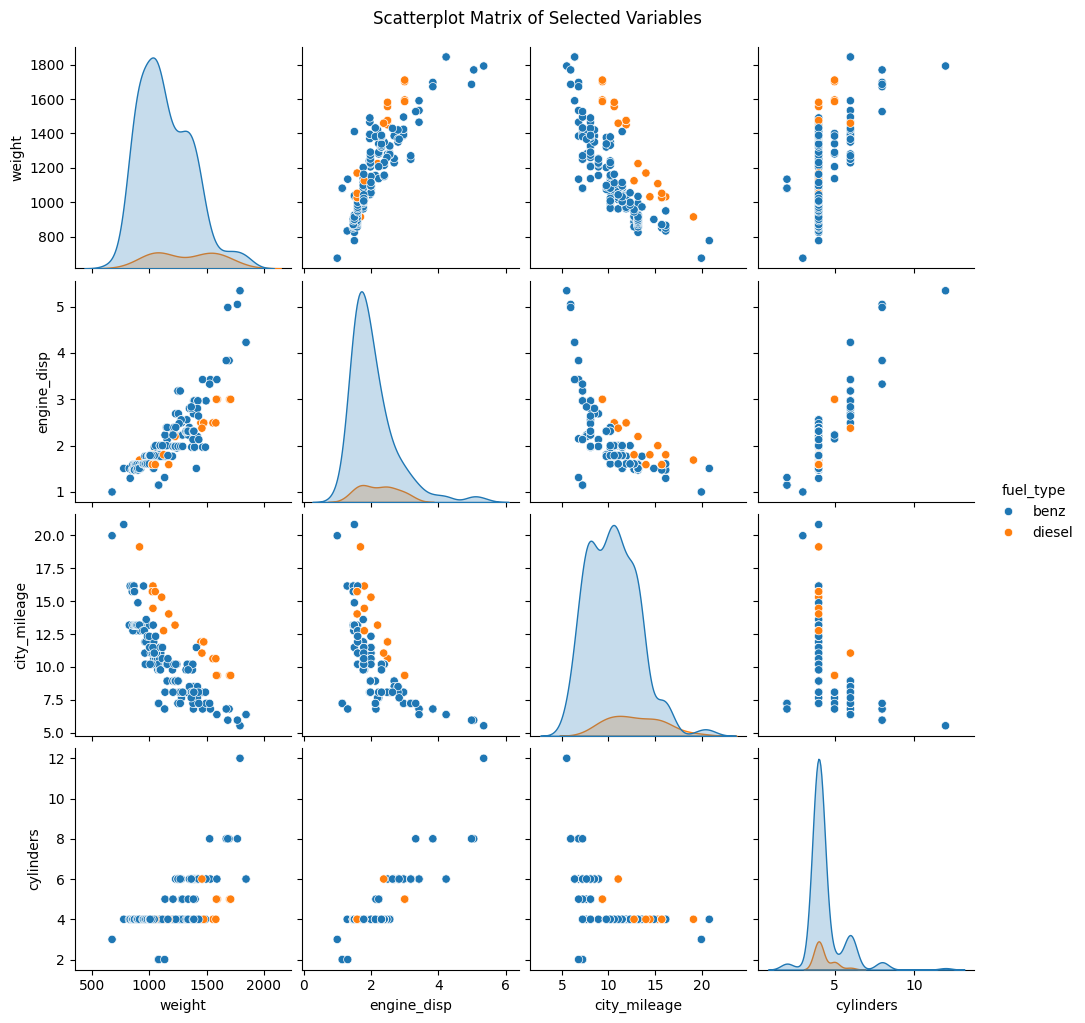

In [6]:
#Exploratory scatterplot matrix with seaborn
sns.pairplot(df1, hue='fuel_type')
plt.suptitle('Scatterplot Matrix of Selected Variables' , y=1.02)
plt.show()

#This code uses hue="fuel_type" to color the points by fuel type, which helps you see how the categorical variable interacts with the others


In [7]:
#Let's create a simple regression model for with two parameters with B0 (intercept) and B1 (slope) that is the coeficient of the independent variable 
# Y =β0+β1X +ϵ

model1 = smf.ols('city_mileage ~ engine_disp', data=data).fit()
print('Simple regression summary\n')
print(model1.summary())

Simple regression summary

                            OLS Regression Results                            
Dep. Variable:           city_mileage   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           4.03e-26
Time:                        18:53:07   Log-Likelihood:                -439.50
No. Observations:                 203   AIC:                             883.0
Df Residuals:                     201   BIC:                             889.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.2663 

## Comments about our results
- ###### R-squared (0.427): This indicates that about 42.7% of the variability in city mileage is explained by the independent variable (engine_disp). Adjusted R-squared (0.424): This is a modified version of R-squared that adjusts for the number of predictors in the model. Since the model has only one predictor, the values are quite similar. It penalizes the model for unnecessary variables, ensuring that only variables that improve the model are counted.

- ###### F-statistic (150.0) and Prob (F-statistic) (4.03e-26): The F-statistic tests whether at least one predictor variable has a non-zero coefficient. Here, the very low p-value indicates that the model, as a whole, is statistically significant. This means the independent variable (engine_disp) is a meaningful predictor of city mileage.

- ###### Intercept (16.2663): This is the estimated value of city mileage when engine displacement is zero. It represents the baseline level of mileage.engine_disp (-2.6628): This is the estimated change in city mileage for a one-unit increase in engine displacement. A negative value suggests that higher engine displacement is associated with lower city mileage.

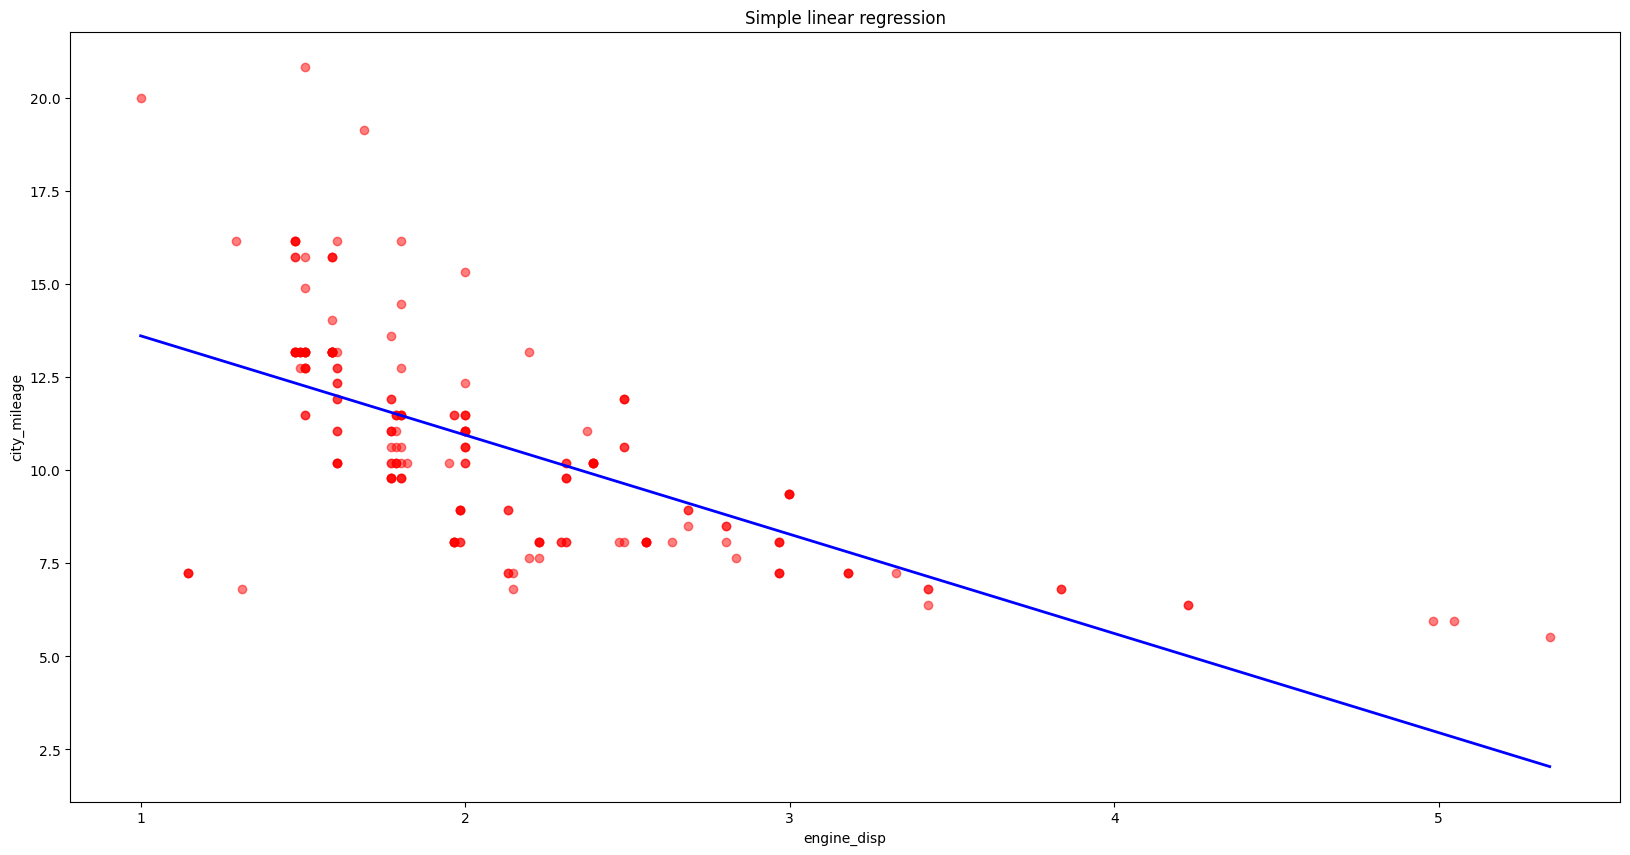

In [8]:
#Let's plot our regression line

plt.figure(figsize=(20,10))
plt.scatter(data.engine_disp, data.city_mileage, color='red', alpha=0.5, label=data)
x_vals = np.linspace(data.engine_disp.min(), data.engine_disp.max(), 100)
y_vals = model1.params['Intercept'] + model1.params['engine_disp'] * x_vals
plt.plot(x_vals, y_vals, color='blue', linewidth=2, label='Fitted Line')
plt.title ('Simple linear regression')
plt.xlabel('engine_disp')
plt.ylabel('city_mileage')
plt.show()



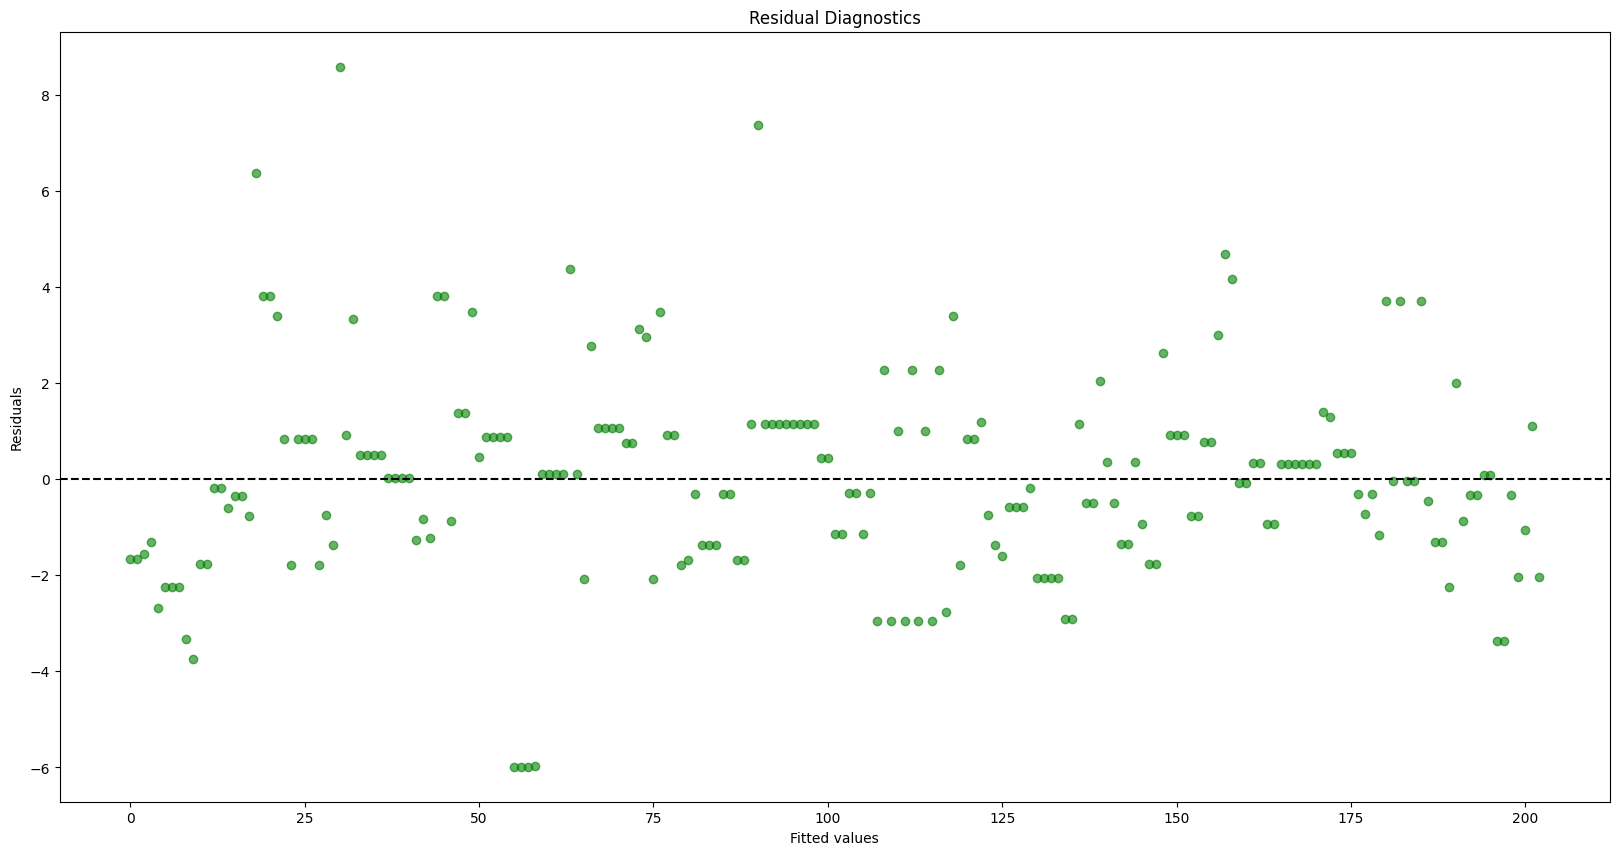

In [9]:
#Now is time to check whether the residuals are randomly distributed around zero. A random scatter around zero indicates that the model captures the linear relationship well and that the variance of the errors is constant (homoscedasticity).
#Residual Diagnostics

plt.figure(figsize=(20,10))
plt.plot(range(len(model1.resid)), 
         model1.resid, 
         marker='o', 
         linestyle='', 
         color='green', 
         alpha=0.6)
plt.title('Residual Diagnostics')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.show()

#The estimated residuals have a zero median by definition. In this case, they do not seem to exhibit any pattern concerning the order of the cars in the sample.

c:\Users\albaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


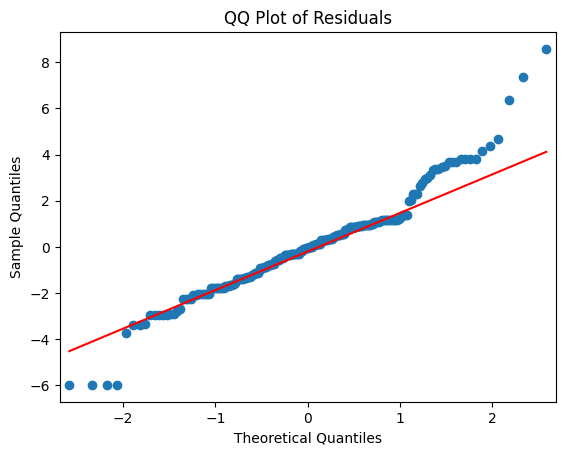

In [10]:
#Let's see the QQ plot for the residuals
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(model1.resid, line='q', color='blue')  
plt.title("QQ Plot of Residuals")
plt.show()

#The estimated residuals are not normal; they show a small left tail and a large right tail that deviates significantly from normality.

In [11]:
#Let's try now to reproduce a simple regression model but in this case let's use a cathegorical variable (fuel_type = B/D)

model2 = smf.ols('city_mileage ~ C(fuel_type)', data=data).fit()
print('Categorical regression summary\n')
print(model2.summary())

#In particular, a diesel-powered car travels (in the city) on average 2.3856 km more than a gasoline-powered car.
#Given that the p-value associated with the test statistic (t or F) is 0.000239, the regression coefficient related to the fuel type variable is significant at α = 0.001

Categorical regression summary

                            OLS Regression Results                            
Dep. Variable:           city_mileage   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     14.00
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           0.000239
Time:                        18:53:10   Log-Likelihood:                -489.24
No. Observations:                 203   AIC:                             982.5
Df Residuals:                     201   BIC:                             989.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

C:\Users\albaa\AppData\Local\Temp\ipykernel_3204\3670116059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel_type', y='city_mileage', data=data, palette=['red', 'blue'])
C:\Users\albaa\AppData\Local\Temp\ipykernel_3204\3670116059.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axhline(y=coef2[0], color='red', linewidth=2, label='Gasoline Mean')
C:\Users\albaa\AppData\Local\Temp\ipykernel_3204\3670116059.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

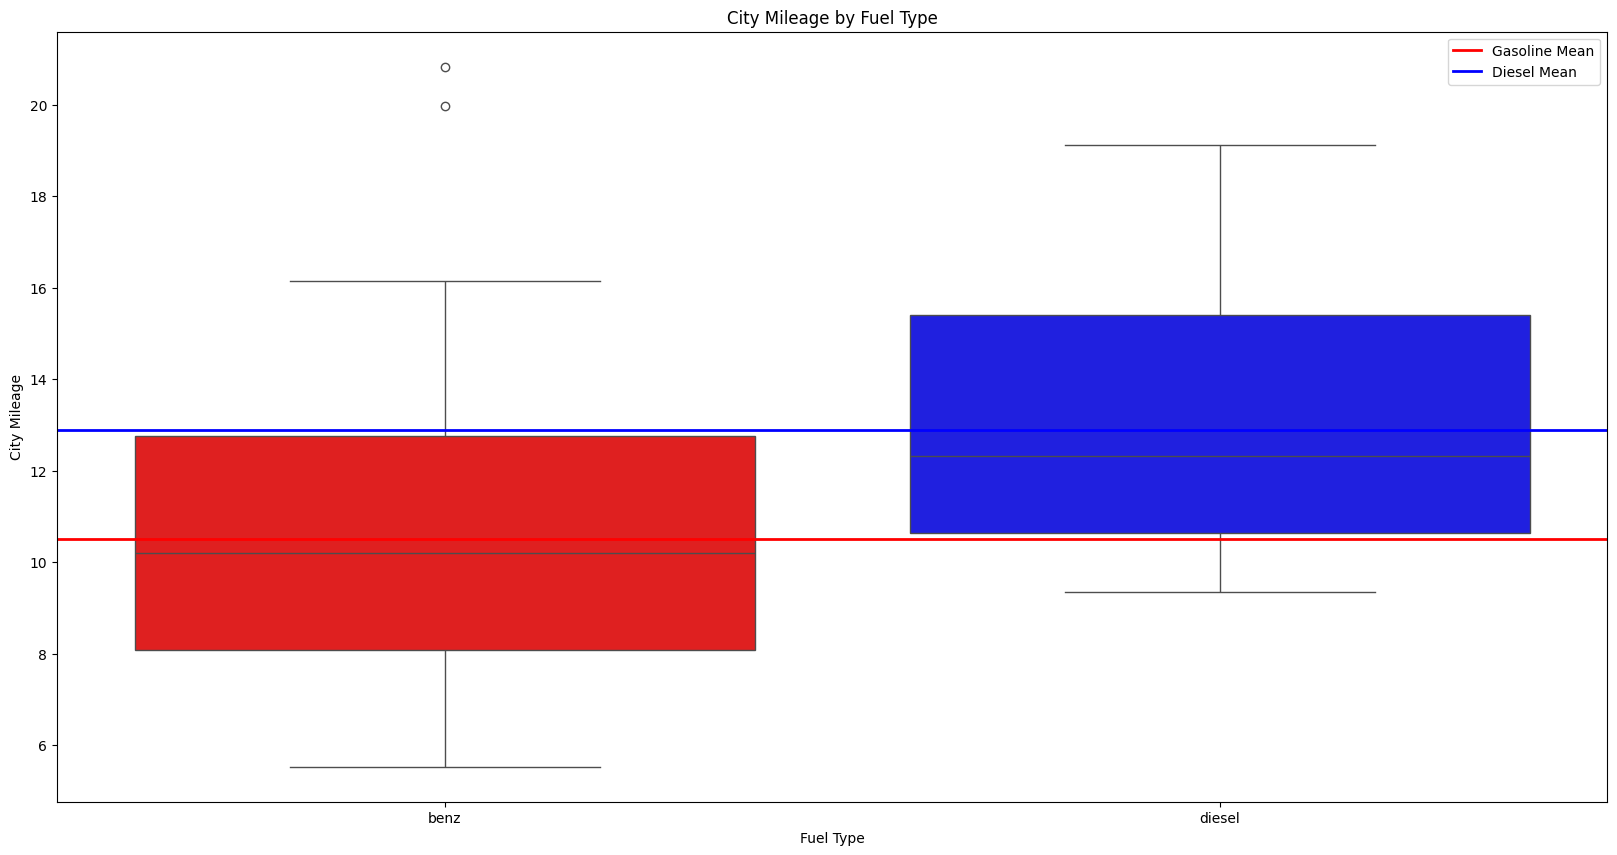

In [12]:
#The boxplot function compares the distribution of city mileage (urban fuel efficiency) for gasoline and diesel cars.
plt.figure(figsize=(20,10))
sns.boxplot(x='fuel_type', y='city_mileage', data=data, palette=['red', 'blue'])
coef2 = model2.params
plt.axhline(y=coef2[0], color='red', linewidth=2, label='Gasoline Mean')
plt.axhline(y=coef2[0]+coef2[1], color='blue', linewidth=2, label='Diesel Mean')
plt.xlabel("Fuel Type")
plt.ylabel("City Mileage")
plt.title("City Mileage by Fuel Type")
plt.legend()
plt.show()

#This boxplot compares city mileage for gasoline (red) and diesel (blue) vehicles. The horizontal lines show the regression-based means, 
# indicating diesel cars generally achieve higher mileage. Outliers suggest some vehicles deviate substantially from the average.


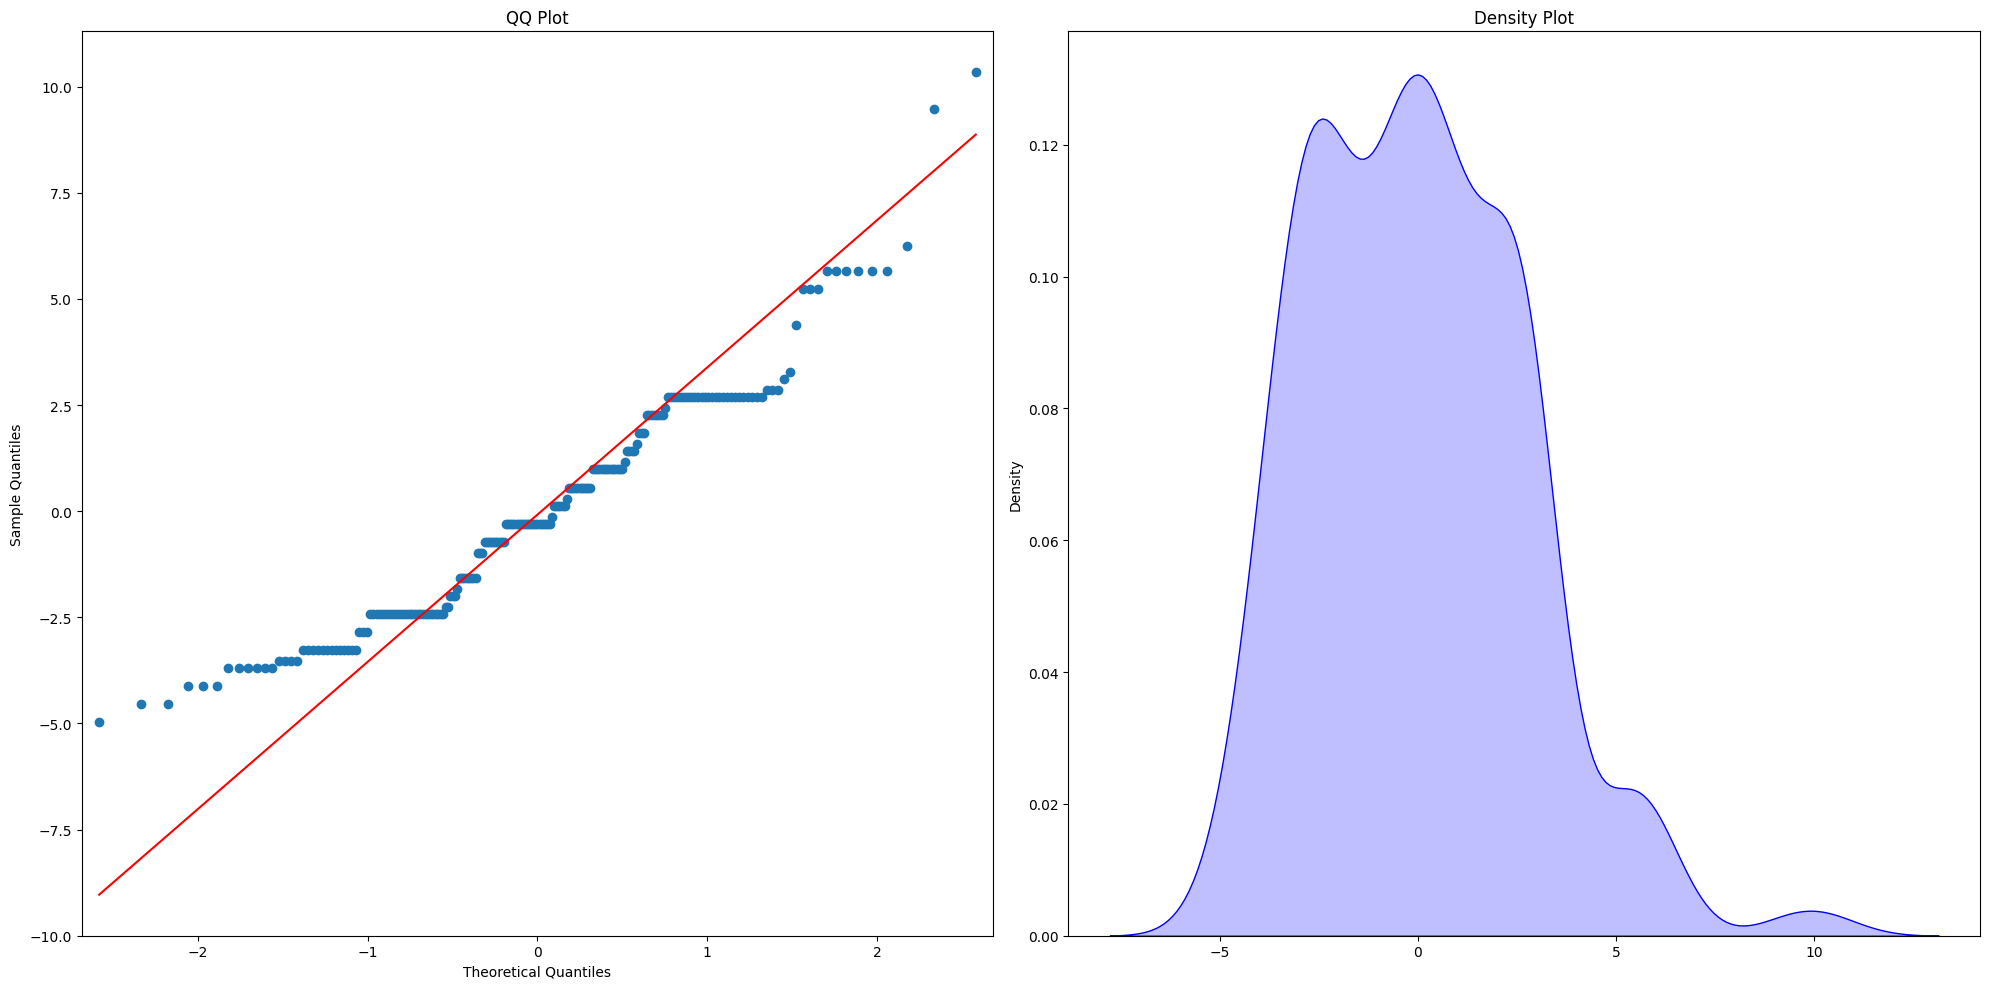

In [13]:
#QQ plot and residuals density plot to evaluate the normality assumption
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
sm.qqplot(model2.resid, line='q', ax=ax1); ax1.set_title('QQ Plot')
sns.kdeplot(model2.resid, fill=True, ax=ax2, color='blue'); ax2.set_title('Density Plot')
plt.tight_layout(); plt.show()

#The Normal Q-Q Plot and Density Plot of the estimated residuals show that the normality assumption of the residuals is violated even more clearly compared to the previous model.



In [14]:
#Let's now make it more complicated and build a multiple regression model 

model3 = smf.ols('city_mileage ~ engine_disp + C(fuel_type)', data=data).fit()
print('Multivariate regression summary\n')
print(model3.summary())



Multivariate regression summary

                            OLS Regression Results                            
Dep. Variable:           city_mileage   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     107.6
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.90e-32
Time:                        18:53:11   Log-Likelihood:                -421.94
No. Observations:                 203   AIC:                             849.9
Df Residuals:                     200   BIC:                             859.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [15]:
#Let's make it more complicated and build a regression with polinomial effect and see how the model reacts 
#Urban fuel consumption = β₀ + β₁(engine displacement) + β₂(engine displacement²) + β₃(engine displacement³) + β₄(fuel type) + ε

#Add squared and cubic terms for engine displacement
data['engine_disp_sq'] = data['engine_disp']**2
data['engine_disp_cu'] = data['engine_disp']**3

model4 = smf.ols('city_mileage ~ engine_disp + engine_disp_sq + engine_disp_cu + C(fuel_type)', data=data).fit()
print('Summary of Polynomial Regression:\n')
print(model4.summary())  

#The effect is not linear so for example we cannot determine how much the urban mileage of gasoline cars changes on average for one more liter of engine displacement.
#What we can deduce that att the same engine displacement, a diesel-powered car travels an average of 3.2141 km more in the city than a gasoline-powered car.
#Comparing the adjusted R² of the four estimated models (in order: 0.4244, 0.06045, 0.5135, and 0.5892), it is observed that the last estimated model is preferable to the others in terms of explanatory power and fit to the data.


Summary of Polynomial Regression:

                            OLS Regression Results                            
Dep. Variable:           city_mileage   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     73.43
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           4.65e-38
Time:                        18:53:11   Log-Likelihood:                -403.74
No. Observations:                 203   AIC:                             817.5
Df Residuals:                     198   BIC:                             834.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

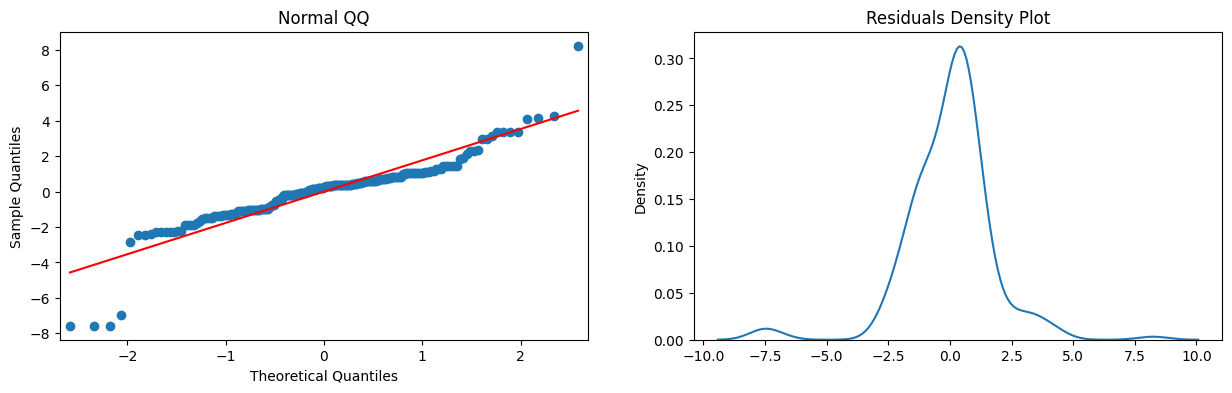

In [16]:
#Let's evaluate the Normality assumsion qith QQ plot and Density of residuals
fig, axs = plt.subplots(1,2, figsize=(15,4))
sm.qqplot(model4.resid, line='s' , ax=axs[0])
axs[0].set_title('Normal QQ')

sns.kdeplot(model4.resid, ax=axs[1])
axs[1].set_title('Residuals Density Plot')

plt.show()


The diagnosis of the residuals from past models highlights that: 
- the estimated residuals are neither normal nor homoscedastic with respect to engine displacement; 
- the relationship between urban travel and engine displacement is not linear, because models with polynomial effects have a higher adjusted R². 

Therefore, we seek a transformation of Y, T(Y), such that the relationship of T(Y) with the X variables is linear. In particular a Generalized linear model.

A commonly used transformation in this context is the Box-Cox transformation, which depends on a parameter λ:
Y(λ) = { (Yᵏ - 1)/λ if λ≠0
log Y if λ=0
Usually, the value of λ is chosen to ensure distributional normality, meaning constant variance throughout the domain. Alternatively, one can find the value of λ such that the sum of squared residuals of the linear model that relates Y*(λ) = β₀ + β₁Yᵏ to the X variables is minimized.

In [17]:
#Let's figure out which λ is optimal optimal possibly with two methods: MSE or MaxL

#Box-Cox transformation function
def coxbox_transform(y, lam):
    if  lam == 0:
        return np.log(y)
    else:
       return (np.power(y, lam)-1)/lam
    
#We need to define a range for lambda
lambdas = np.linspace(-1,2, 200)
ssr_values = []

#Let's loop over the lambdas candidates
for lam in lambdas:
    data['Y_tran'] = coxbox_transform(data['city_mileage'], lam)
    model_tran = smf.ols('Y_tran ~ engine_disp + engine_disp_sq + engine_disp_cu + C(fuel_type)', data=data).fit()

#Need to calcoluate the SSR (sum square residuals)
    ssr = np.sum(model_tran.resid ** 2)
    ssr_values.append(ssr)

#At the end we find the optimal lambda that minimize the SSR
opt_lambda = lambdas[np.argmin(ssr_values)]
print('OPTIMAL LAMBDA IS:', opt_lambda)

# Print the minimum SSR value
min_ssr = np.min(ssr_values)
print(f'Minimum SSR:', min_ssr)


OPTIMAL LAMBDA IS: -1.0
Minimum SSR: 0.04694709616806897


In [18]:
# As our optimal lambda is -1 we gonna use an inverse Y 
# Estimate the model on the inverse of city mileage
# 1/city_mileage = β0 + β1*engine_disp + β2*fuel_type

model5 = smf.ols('I(1/city_mileage) ~ engine_disp + C(fuel_type)', data=data).fit()
print(model5.summary())

# At equal engine displacement, diesel-powered cars save 0.025 L/km compared to gasoline-powered ones. As is inverse we are talking about L/km 
# The average fuel consumption of gasoline cars increases by 0.0289 L/km for every unit increase in engine displacement. For diesel cars the same result applies, since the model does not include any interaction effects between fuel type and engine displacement.

#The models are not comparable in therms on ADJUSTED R^2 as the Y is different. To compare we need to retro-transform our Y.

                             OLS Regression Results                            
Dep. Variable:     I(1 / city_mileage)   R-squared:                       0.638
Model:                             OLS   Adj. R-squared:                  0.634
Method:                  Least Squares   F-statistic:                     176.3
Date:                 Wed, 26 Mar 2025   Prob (F-statistic):           7.23e-45
Time:                         18:53:14   Log-Likelihood:                 557.44
No. Observations:                  203   AIC:                            -1109.
Df Residuals:                      200   BIC:                            -1099.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

In [19]:
# For the residuals to find the R^2 we need the difference between our data and the predictions. The formula is R^2= 1 - (∑(y_i - ŷ_i)²) / (∑(y_i - ȳ)²) 

residuals5 = data['city_mileage']-(1/model5.fittedvalues)
R2 = 1 - (np.sum(residuals5**2))/(np.var(data['city_mileage'])*(203-1))
print("R² =", R2)

#Our R^2 is 0.56

R² = 0.5593052771859672


In [20]:
# Let's plot and compare 
coef5 = model5.params

#Trasposed table
coefT = coef5.to_frame().T


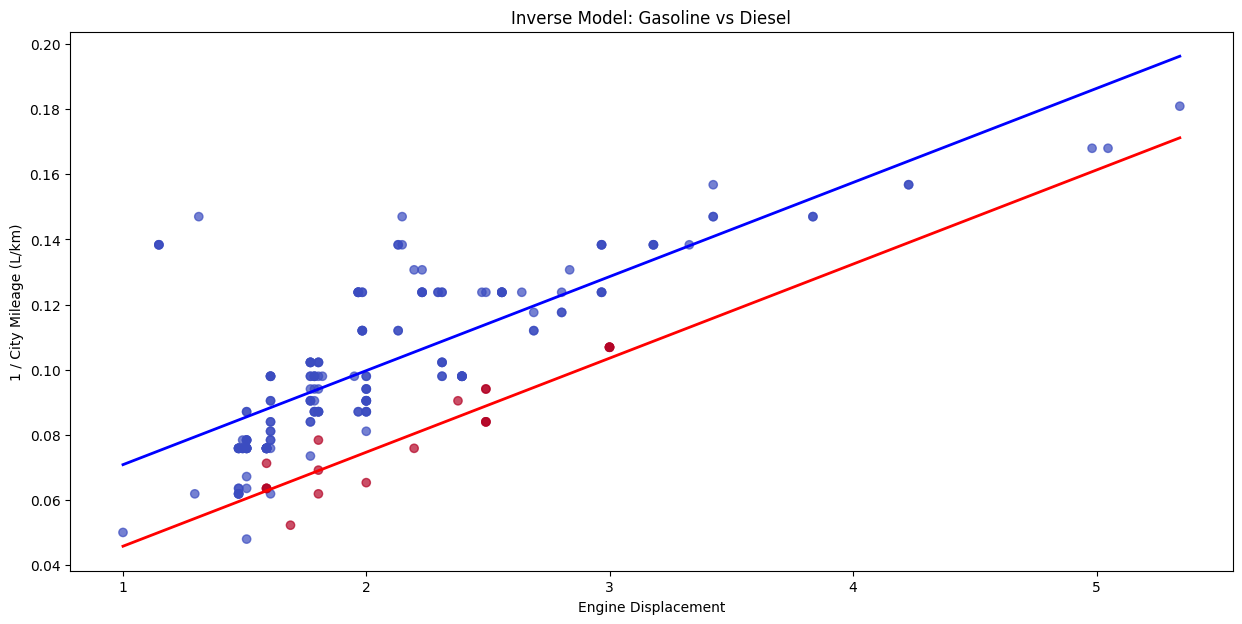

In [ ]:
#Let's plot and compare with a Scatterplot (blue = gas , red = diesel)
# Create a range of engine displacement values
engine_disp_range = np.linspace(data['engine_disp'].min(), data['engine_disp'].max(), 100)


pred_data = pd.DataFrame({'engine_disp': engine_disp_range})

# Duplicate pred_data for each fuel type
pred_data_gasoline = pred_data.copy()
pred_data_gasoline['fuel_type'] = 'benz'  

pred_data_diesel = pred_data.copy()
pred_data_diesel['fuel_type'] = 'diesel'

# Generate predictions from model5 for each fuel type
pred_gasoline = model5.predict(pred_data_gasoline)
pred_diesel   = model5.predict(pred_data_diesel)

# Plot the observed data and the fitted lines
plt.figure(figsize=(15, 7))
plt.scatter(data['engine_disp'], 1 / data['city_mileage'], 
            c=(data['fuel_type'] == 'diesel'), cmap='coolwarm', alpha=0.7, label='Actual data')
plt.plot(engine_disp_range, pred_gasoline, color='blue', linewidth=2, label='Gasoline (model)')
plt.plot(engine_disp_range, pred_diesel, color='red', linewidth=2, label='Diesel (model)')
plt.xlabel("Engine Displacement")
plt.ylabel("1 / City Mileage (L/km)")
plt.title("Inverse Model: Gasoline vs Diesel")
plt.show()

# # We can see that Diesel cars have a lower consumption (higher city mileage) compared to gasoline cars.

C:\Users\albaa\AppData\Local\Temp\ipykernel_3204\453763053.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(model5.resid, ax=axs[1], shade='True', color='blue')


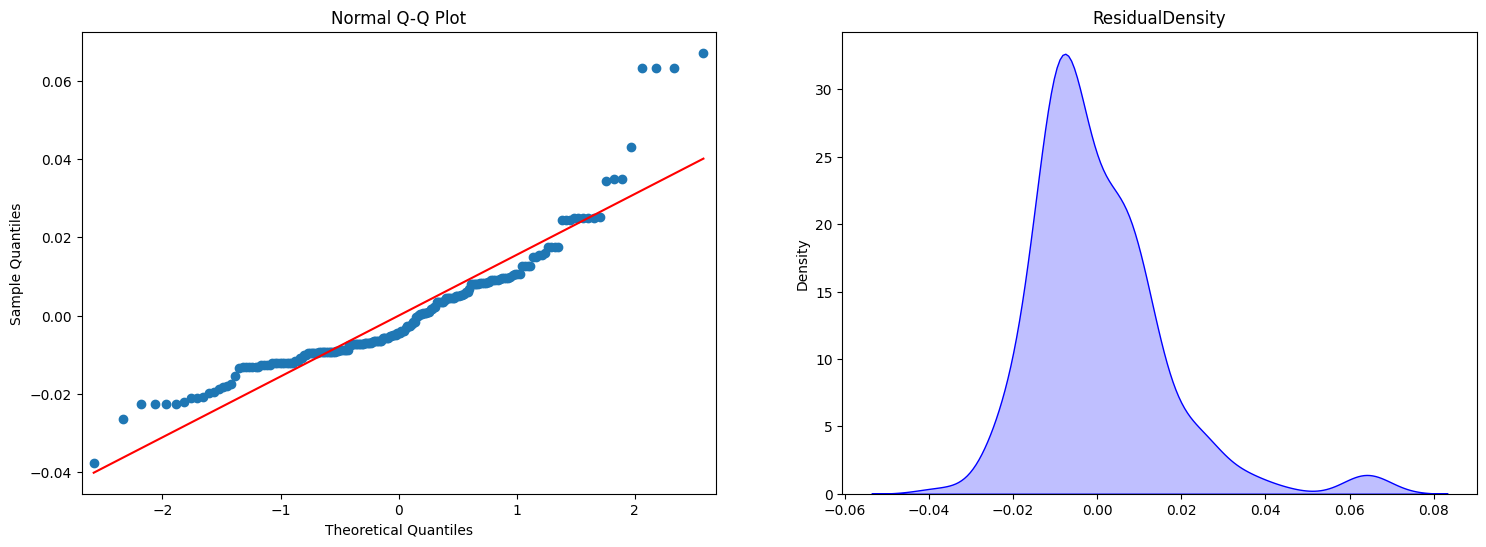

In [22]:
#Let's test the normality of our residuals witth QQ and Density plot

fig, axs = plt.subplots(1,2, figsize=(18,6))

sm.qqplot(model5.resid, line='s', ax=axs[0])
axs[0].set_title("Normal Q-Q Plot")
sns.kdeplot(model5.resid, ax=axs[1], shade='True', color='blue')
axs[1].set_title("ResidualDensity")

plt.show()

# Unfortunately our residuals are not normally distributed. We can see and improvment on the left side but lambda = -1 is not enoght we need to try with the logarithmic transformation.

In [ ]:
# Logarithmic transformation it serves to correct the heterogeneity of residuals, let's add also weight to our model

model6 = smf.ols('np.log(city_mileage) ~ np.log(engine_disp) + np.log(weight) + C(fuel_type)', data=data).fit()
print(model6.summary())

#We found an interesting thing that log(engine_disp) is not significant fro the model as we can see a 0.344 p-value so we need to remove it from the model

                             OLS Regression Results                             
Dep. Variable:     np.log(city_mileage)   R-squared:                       0.830
Model:                              OLS   Adj. R-squared:                  0.828
Method:                   Least Squares   F-statistic:                     324.6
Date:                  mer, 26 mar 2025   Prob (F-statistic):           2.28e-76
Time:                          18:53:56   Log-Likelihood:                 167.39
No. Observations:                   203   AIC:                            -326.8
Df Residuals:                       199   BIC:                            -313.5
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

In [ ]:
# The new log model without engine displacement

model7 = smf.ols('np.log(city_mileage) ~ np.log(weight) + C(fuel_type)', data=data).fit()
print(model7.summary())

                             OLS Regression Results                             
Dep. Variable:     np.log(city_mileage)   R-squared:                       0.830
Model:                              OLS   Adj. R-squared:                  0.828
Method:                   Least Squares   F-statistic:                     486.7
Date:                  gio, 27 mar 2025   Prob (F-statistic):           1.43e-77
Time:                          00:31:35   Log-Likelihood:                 166.93
No. Observations:                   203   AIC:                            -327.9
Df Residuals:                       200   BIC:                            -317.9
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

C:\Users\albaa\AppData\Local\Temp\ipykernel_3204\3048377810.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(model7.resid, ax=axs[1], shade='True', color='blue')


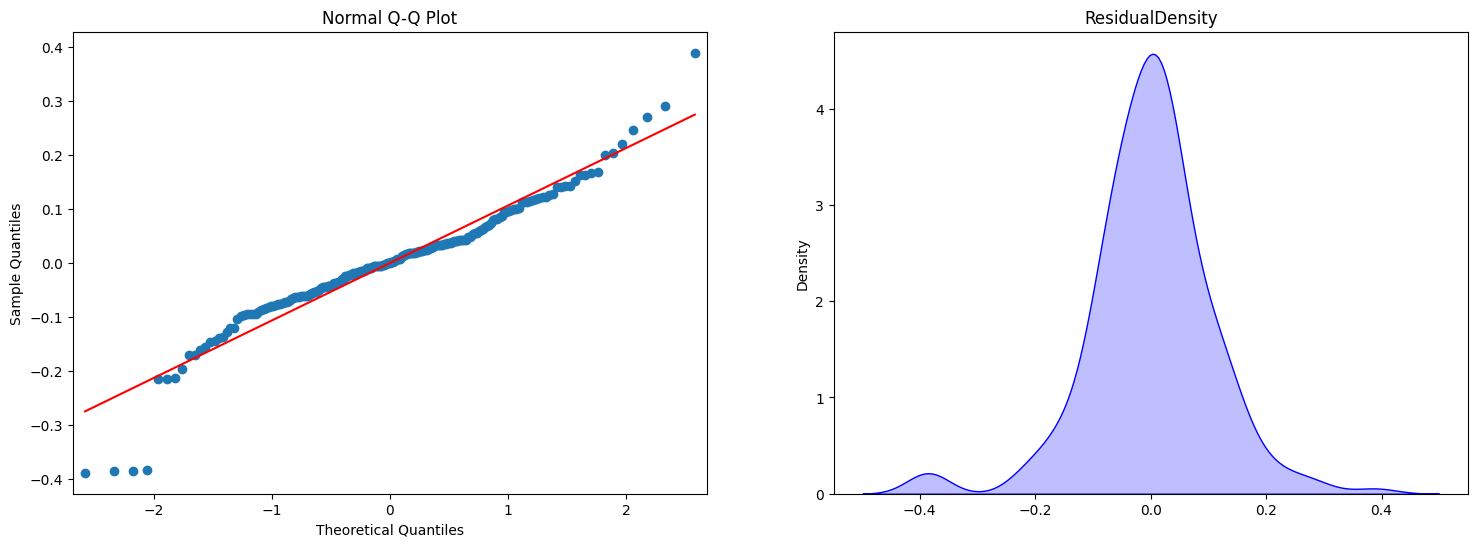

In [ ]:
# Let's test the normality of our residuals witth QQ and Density plot

fig, axs = plt.subplots(1,2, figsize=(18,6))

sm.qqplot(model7.resid, line='s', ax=axs[0])
axs[0].set_title("Normal Q-Q Plot")
sns.kdeplot(model7.resid, ax=axs[1], shade='True', color='blue')
axs[1].set_title("ResidualDensity")

plt.show()

# Now our residuals are normally distributed

In [ ]:
#Let's evaluate our R^2

residui = data['city_mileage'] - np.exp(model7.fittedvalues)
ssr = np.sum(residui**2)
denominator = data['city_mileage'].var() * (203 - 1)
R2 = 1 - (ssr / denominator)

print("R² =", R2)

# The R^2 is 0.84 so we can consider this a solid model

R² = 0.8350826777522675
